In [302]:
#Imports 
import numpy as np
import pandas as pd 
import string 

import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets 
from ipywidgets import interact 

plt.rcParams['figure.figsize'] = (15,5)
plt.style.use('fivethirtyeight')

In [303]:
#Reading the dataset
data = pd.read_csv('drug.csv')

#Print the shape of the dataset
print ("The shape of the dataset: ",data.shape)

The shape of the dataset:  (161297, 7)


In [304]:
#Check head of the dataset,5 first data.
data.head()

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,3-Nov-15,10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37


In [305]:
#Explore some of the important column in the dataset

print("Number of Unique Drugs present in the dataset: ", data['drugName'].nunique())
print("Number of Unique Medical Conditions present in the dataset: ", data['condition'].nunique())

print("\nThe Time Period of Collecting The Data")
print("Starting Date: ", data['date'].min())
print("Ending Date: ", data['date'].max())

Number of Unique Drugs present in the dataset:  3436
Number of Unique Medical Conditions present in the dataset:  884

The Time Period of Collecting The Data
Starting Date:  1-Apr-08
Ending Date:  9-Sep-17


In [306]:
#SUMMARIZING THE DATASET

In [307]:
#Using describe() function

In [308]:
#Summarize the dataset
data[['rating','usefulCount']].describe()

,rating,usefulCount
count,161297.000000,161297.000000
mean,6.994377,28.004755
std,3.272329,36.403742
min,1.000000,0.000000
25%,5.000000,6.000000
50%,8.000000,16.000000
75%,10.000000,36.000000
max,10.000000,1291.000000


In [309]:
#Most of the reviews are positive - very good sign.

In [310]:
#Analyze the useless and zero usefull drugs.

#Check the number and name of drugs with 0 useful count in details.
print("Analysis on useless drugs")
print("_________________________")
print("The Number of Drugs With No Useful Count: ", data[data['usefulCount'] == 0].count()[0])

#Check the number of drugs with no useful count with review greater that or equal to 8.
print("Number of good drugs with lesser useful count: ", data[data['rating'] >= 8].count()[0])

#Check the average rating of the drugs with no useful count.
print("Average rating of drugs with no useful count: {0:.2f}".format(data[data['usefulCount'] == 0]['rating'].mean()))


print("\nAnalysis On Useful Drugs")
print("__________________________")
print("Average rating of drugs with greater than 1000 useful counts: ", [data[data['usefulCount'] > 1000].count()[0]])

print("\nName and Condition of these Drugs: \n\n",
     data[data['usefulCount']>1000][['drugName','condition']].reset_index(drop = True))

Analysis on useless drugs
_________________________
The Number of Drugs With No Useful Count:  6318
Number of good drugs with lesser useful count:  97410
Average rating of drugs with no useful count: 5.80

Analysis On Useful Drugs
__________________________
Average rating of drugs with greater than 1000 useful counts:  [4]

Name and Condition of these Drugs: 

          drugName      condition
0          Mirena  Birth Control
1      Sertraline     Depression
2  Levonorgestrel  Birth Control
3          Zoloft     Depression


In [311]:
#SUMMARIZE CATEGORICAL DATA

In [312]:
#Summarize categorical data
data[['drugName','condition','review']].describe(include = 'object')

#Need to specify 'include = object' inside describe() function.

,drugName,condition,review
count,161297,160398,161297
unique,3436,884,112329
top,Levonorgestrel,Birth Control,"""Good"""
freq,3657,28788,33


In [313]:
#CHECK MISSING VALUES.

In [314]:
#Check for missing values.
data.isnull().sum()

uniqueID         0
drugName         0
condition      899
review           0
rating           0
date             0
usefulCount      0
dtype: int64

In [315]:
#Missing values are only have in 'condition'.

In [316]:
#Removes all records where the conditions is missing using 'drop any' dropna() function.

#'condition' is important column. 

In [317]:
#Delete all the records where 'condition' is missing.
data = data.dropna()

#Check the missing values.
data.isnull().sum().sum()

0

In [318]:
#Missing values are cleaned!

In [319]:
#Unveiling Hidden Patterns From The Dataset.

In [320]:
#1. Check the distribution of the rating and 'usefulCount' column.
# --- Using 'distplot()' function available in seaborn library.

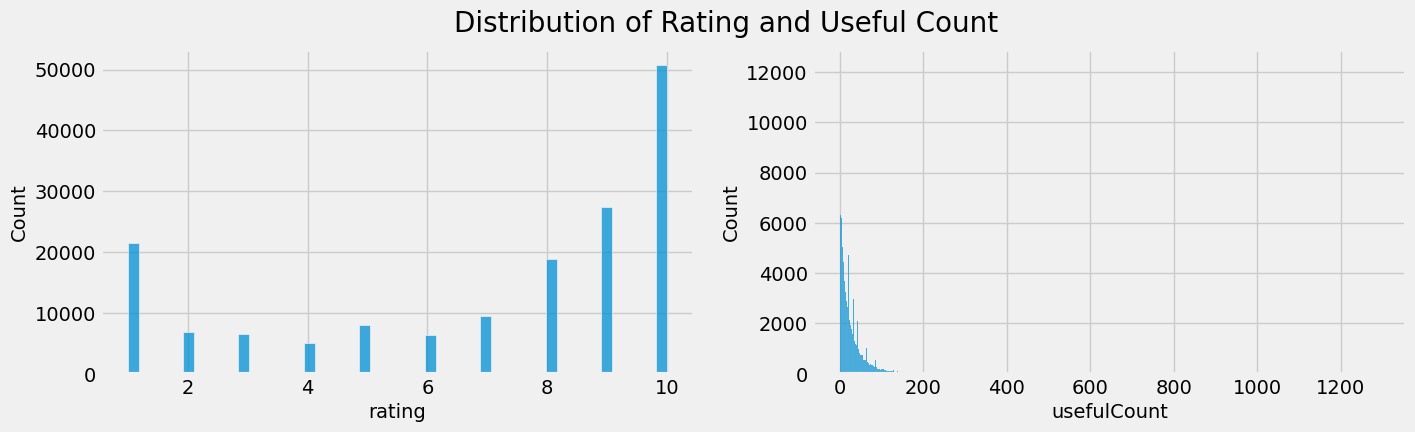

In [321]:
plt.rcParams['figure.figsize'] = (15,4)

plt.subplot(1,2,1)
sns.histplot(data['rating'])

plt.subplot(1,2,2)
sns.histplot(data['usefulCount'])

plt.suptitle('Distribution of Rating and Useful Count \n', fontsize = 20)
plt.show()

In [322]:
#Output explaination 
#---Most patient give rating of 8, 9, 10.
#---'usefulCount' highly skewed 
#---Most of the drugs present in the data has less than 200 useful count.

In [323]:
#2. Check relationship between 'rating' and 'usefulCount'

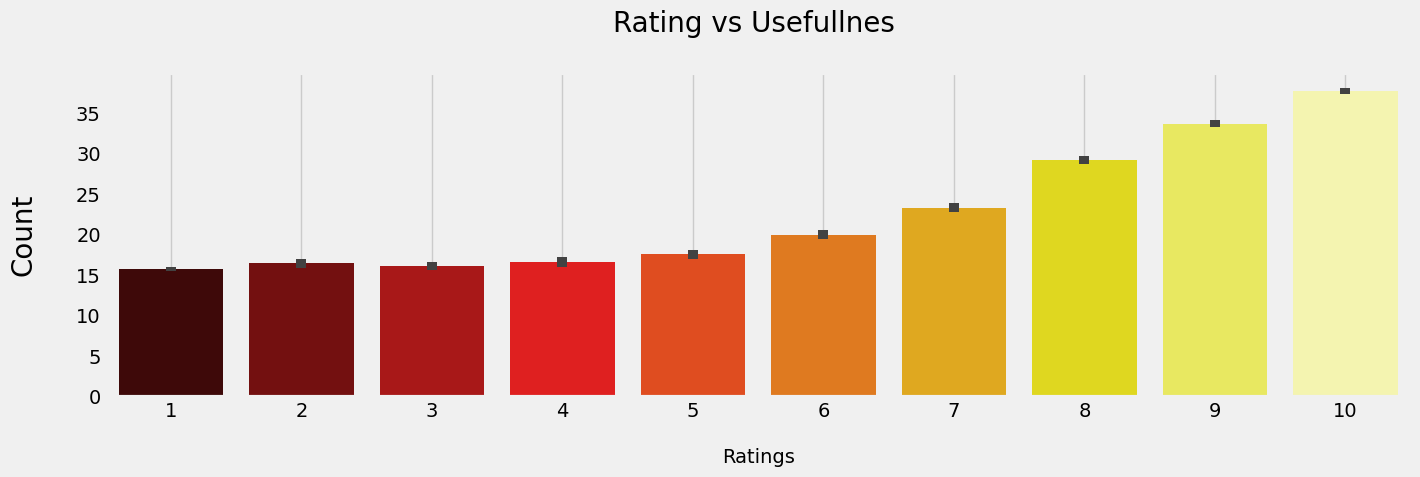

In [324]:
#Check the impact of the ratings on usefullness

#With using barplot + hot palette

plt.rcParams['figure.figsize'] = (15,4)
sns.barplot(x = data.rating, y = data.usefulCount, palette = 'hot')
plt.grid()
plt.xlabel('\nRatings')
plt.ylabel('Count\n', fontsize = 20)
plt.title('Rating vs Usefullnes \n', fontsize = 20)
plt.show()

In [325]:
#Output explaination:
#Clearly visible there is a positive linear relationship between the 'rating' and 'usefulCount' column.
#Number of average use for count is increasing as are the raging increasing.

In [326]:
#3. Analyze the impact of of ratings on the length of reviews.

In [327]:
#This can help unnderstand whether longer reviews lead to positive reviews or not.

In [328]:
#Checking whether the length of review has any impact on ratings of the drugs.

#For that we need to create a new column to calculate length of the reviews.

data['len'] = data['review'].apply(len)

In [329]:
#Check the impact of the length of reviews on ratings.
data[['rating','len']].groupby(['rating']).agg(['min','mean','max'])

len                   
       min        mean    max
rating                       
1        5  428.784505   3692
2        9  452.902893  10787
3        8  461.249961   5112
4        7  464.077912   3030
5        6  477.982661   2048
6        4  467.957150   2202
7        6  485.597765   3063
8        3  483.584163   4087
9        3  477.696117   6182
10       3  443.215923   6192

In [330]:
#5. Check the highest length review.

In [331]:
#Check the highest length review.
print("Length of the longest review", data['len'].max())
data['review'][data['len'] == data['len'].max()].iloc[0]

Length of the longest review 10787


'"Two and a half months ago I was prescribed Venlafaxine to help prevent chronic migraines.\r\nIt did help the migraines (reduced them by almost half), but with it came a host of side effects that were far worse than the problem I was trying to get rid of.\r\nHaving now come off of the stuff, I would not recommend anyone ever use Venlafaxine unless they suffer from extreme / suicidal depression. I mean extreme in the most emphatic sense of the word. \r\nBefore trying Venlafaxine, I was a writer. While on Venlafaxine, I could barely write or speak or communicate at all. More than that, I just didn&#039;t want to. Not normal for a usually outgoing extrovert.\r\nNow, I&#039;m beginning to write again - but my ability to speak and converse with others has deteriorated by about 95%. Writing these words is taking forever; keeping up in conversation with even one person is impossible, and I barely see the point of trying either. On Venlafaxine, words pretty much left me - my conversational vo

# CLEANING THE REVIEWS.

In [332]:
#Perform textual analysis.
#Remove stopwords.
#Remove punctuation.

In [333]:
#Remove punctuations from the reviews.
def punctuation_removal(messy_str):
    clean_list = [char for char in messy_str if char not in string.punctuation]
    clean_str = ''.join(clean_list)
    return clean_str

data['review'] = data['review'].apply(punctuation_removal)

In [334]:
#Remove stopwords.
import nltk
nltk.download('stopwords')
nltk.download('punkt')

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

stop = stopwords.words('english')
stop.append("i'm")

stop_words = []

for item in stop:
    new_item = punctuation_removal(item)
    stop_words.append(new_item)
    
def stopwords_removal(messy_str):
    messy_str = word_tokenize(messy_str)
    return[word.lower() for word in messy_str
          if word.lower() not in stop_words]

data['review'] = data['review'].apply(stopwords_removal)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [335]:
#Remove number.
import re
def drop_numbers(list_text):
    list_text_new = []
    for i in list_text:
        if not re.search('\d', i):
            list_text_new.append(i)
    return ' '.join(list_text_new)

data['review'] = data['review'].apply(drop_numbers)

# Calculating Sentiment From Reviews

In [336]:
#Using Vader Lexicon

import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [337]:
#Calculate sentiment from the reviews

from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

train_sentiments = []

for i in data['review']:
     train_sentiments.append(sid.polarity_scores(i).get('compound'))
    
train_sentiments = np.asarray(train_sentiments)
data['sentiment'] = pd.Series(data=train_sentiments)

In [338]:
#Check impact of sentiment reviews
data[['rating','sentiment']].groupby(['rating']).agg(['min','mean','max'])

sentiment                  
             min      mean     max
rating                            
1        -0.9931  0.005311  0.9898
2        -0.9929  0.003867  0.9924
3        -0.9925  0.003170  0.9877
4        -0.9919  0.000697  0.9867
5        -0.9920  0.014445  0.9882
6        -0.9914  0.008838  0.9936
7        -0.9938 -0.000509  0.9911
8        -0.9936  0.008952  0.9923
9        -0.9964  0.009489  0.9911
10       -0.9982  0.005446  0.9923

In [339]:
#Remove unnecessary columns from the dataset using the drop function.
data = data.drop(['date','uniqueID','review','sentiment','len'], axis =1)

#Check the name of the columns
data.columns

Index(['drugName', 'condition', 'rating', 'usefulCount'], dtype='object')

# Calculating Effectiveness and Usefulness of Drugs.

In [340]:
#1. Create a function to calculate the effective score.

#---Using a formula that we think will work intuitively.

In [341]:
#Calculate an effective rating.

min_rating = data['rating'].min()
max_rating = data['rating'].max()

def scale_rating(rating):
    rating -= min_rating
    rating = rating/(max_rating - 1)
    rating *= 5
    rating = int(round(rating, 0))
    
    if(int(rating) == 0 or int(rating) == 1 or int(rating) ==2):
        return 0
    else:
        return 1
    
data['eff_score'] = data['rating'].apply(scale_rating)

In [342]:
#2. Calculate usefulness score.

In [343]:
#Calculate usefulness score
data['usefulness'] = data['rating']*data['usefulCount']*data['eff_score']


#Check the top 10 most useful drugs with the respective conditions.
data[['drugName','condition','usefulness']][data['usefulness']>
    data['usefulness'].mean()].sort_values(by = 'usefulness',
        ascending = False).head(10).reset_index(drop = True)

,drugName,condition,usefulness
0,Sertraline,Depression,12910
1,Zoloft,Depression,12910
2,Levonorgestrel,Birth Control,12470
3,Mirena,Birth Control,12470
4,Zoloft,Depression,8541
5,Phentermine,Weight Loss,7960
6,Adipex-P,Weight Loss,7960
7,Implanon,Birth Control,7300
8,Viibryd,Depression,6930
9,Vilazodone,Depression,6930


# Analyzing The Medical Conditions

In [344]:
#1. Make an interactive function using ipywidget library.

In [345]:
#Calculate the number of useless and useful drugs for each condition.

@interact
def check(condition = list(data['condition'].value_counts().index)):
    return data[data['condition'] == condition]['eff_score'].value_counts()

interactive(children=(Dropdown(description='condition', options=('Birth Control', 'Depression', 'Pain', 'Anxie…

In [346]:
#2. Check result using barplot.

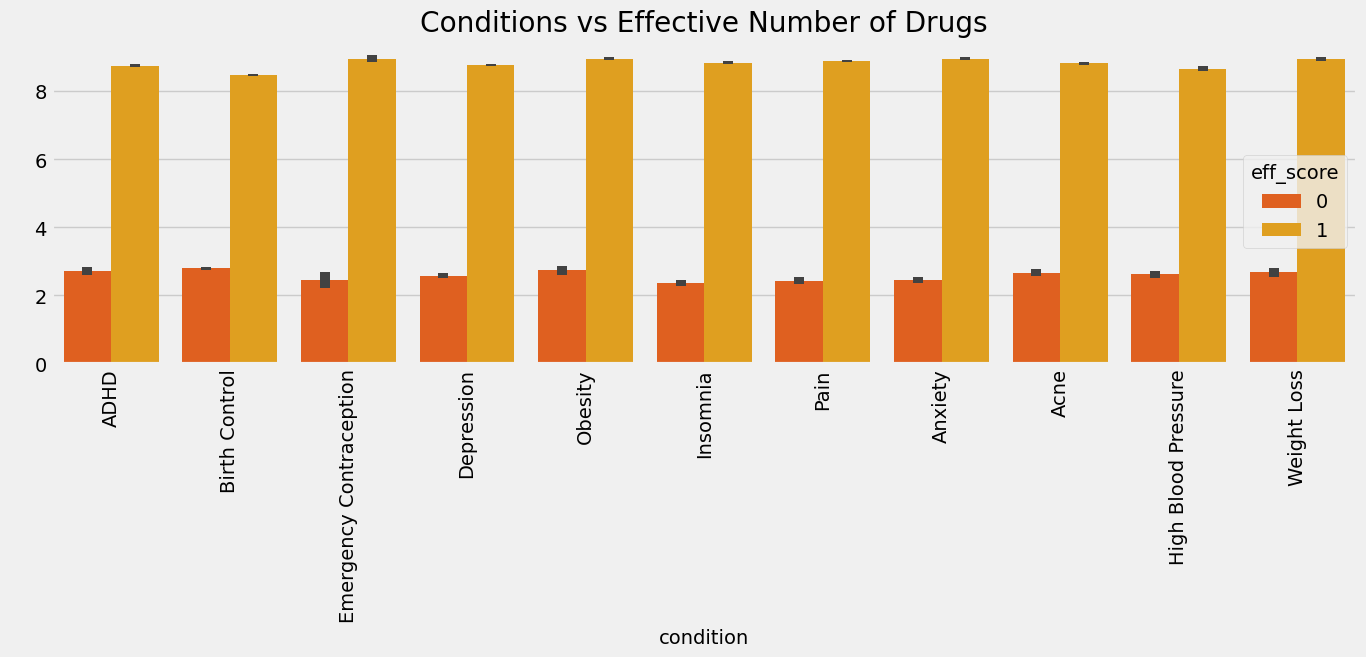

In [352]:
#Check in the graph.

popular_conditions = ('Birth Control','Depression','Pain','Anxiety','Acne','Bipolar Disorder',
                     'Insomnia','Weight Loss','Obesity','ADHD','Diabetes Type 2','Emergency Contraception',
                     'High Blood Pressure','Migrane')
conditions = data.loc[data['condition'].isin(popular_conditions)]


sns.barplot(x=conditions['condition'], y=conditions['rating'],hue = data['eff_score'], palette = 'autumn')

plt.title('Conditions vs Effective Number of Drugs')
plt.xticks(rotation = 90)
plt.ylabel(' ')
plt.show()

In [348]:
#Check the most common conditions.

print("Number of Unique Conditions: ", data['condition'].nunique())
data['condition'].value_counts().head(10)

Number of Unique Conditions:  884


Birth Control      28788
Depression          9069
Pain                6145
Anxiety             5904
Acne                5588
Bipolar Disorde     4224
Insomnia            3673
Weight Loss         3609
Obesity             3568
ADHD                3383
Name: condition, dtype: int64

In [350]:
#Check the drugs useful to the highest number of people.

data[['drugName','usefulCount']][data['usefulCount'] > data['usefulCount'].mean()].sort_values(by = 'usefulCount',
                    ascending = False).head(10).reset_index(drop = True)

,drugName,usefulCount
0,Zoloft,1291
1,Sertraline,1291
2,Levonorgestrel,1247
3,Mirena,1247
4,Zoloft,949
5,Adipex-P,796
6,Phentermine,796
7,Celexa,771
8,Citalopram,771
9,Implanon,730


# Finding Most Useful and Useful Drugs For Each Condition.

In [351]:
#Remove all duplicates from the dataset.
data = data.drop_duplicates()

In [354]:
#Find the highest and lowest rated drugs for each condition.

@interact
def high_low_rate(condition = list(data['condition'].value_counts().index)):
    
    print("\n Top 5 Drugs")
    
    print(data[data['condition'] == condition][['drugName','usefulness']].sort_values(by = 'usefulness',
                    ascending = False).head().reset_index(drop = True))
    
    print("\n \n Bottom 5 Drugs")
    print(data[data['condition'] == condition][['drugName','usefulness']].sort_values(by = 'usefulness',
         ascending = True).head().reset_index(drop = True))

interactive(children=(Dropdown(description='condition', options=('Birth Control', 'Depression', 'Pain', 'Anxie…